# **REGRESSION**

In [4]:
# Import des libraries
import time
import warnings
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import auto_co2 as co2

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

warnings.simplefilter(action='ignore', category=FutureWarning)
sys.path.insert(0, '../src/')

file_path = "../data/processed/co2_classification_20240112-161106.pkl"

# Convert the loaded data to a DataFrame
df = pd.read_pickle(file_path)

Ce code accomplit plusieurs choses :

pd.set_option('display.max_columns', None) et pd.set_option('display.max_rows', 100) : Ces lignes utilisent des fonctionnalités de Pandas pour définir les options d'affichage. Elles modifient les paramètres pour permettre l'affichage de toutes les colonnes (sans troncature) et limitent l'affichage à 100 lignes maximum dans une cellule ou un tableau.

from sklearn.model_selection import train_test_split, from sklearn.tree import DecisionTreeClassifier, from sklearn.ensemble import RandomForestClassifier : Ces lignes importent des classes ou des fonctions spécifiques de la bibliothèque scikit-learn (sklearn).

train_test_split est utilisé pour diviser les données en ensembles d'entraînement et de test.
DecisionTreeClassifier et RandomForestClassifier sont des algorithmes de classification basés sur les arbres de décision et les forêts aléatoires respectivement.
import warnings warnings.simplefilter(action='ignore', category=FutureWarning) : Cette partie importe le module warnings et configure le filtrage pour ignorer les avertissements de type FutureWarning. Cela peut être utile lorsque des avertissements spécifiques sont jugés non critiques pour l'exécution du code.

In [ ]:
co2.styles.display_info(df)
target = df['Co2']
data = df.drop(columns='Co2Grade')

co2.styles.displayer(data)
co2.styles.displayer(pd.DataFrame(target))

CategoryOf                          0
MassRunningOrder                    0
Co2                                 0
EngineCapacity                      0
EnginePower                         0
InnovativeTechnology                0
InnovativeEmissionsReductionWltp    0
FuelConsumption                     0
ElectricRange                       0
Pool_BMW                            0
Pool_FORD                           0
Pool_HYUNDAI                        0
Pool_HYUNDAI MOTOR EUROPE           0
Pool_KIA                            0
Pool_MAZDA-SUBARU-SUZUKI-TOYOTA     0
Pool_MERCEDES-BENZ                  0
Pool_RENAULT-NISSAN-MITSUBISHI      0
Pool_STELLANTIS                     0
Pool_TESLA                          0
Pool_TESLA-HONDA-JLR                0
Pool_VOLKSWAGEN                     0
Pool_VW-SAIC                        0
Fuel_DIESEL                         0
Fuel_DIESEL/ELECTRIC                0
Fuel_ETHANOL                        0
Fuel_LPG                            0
Fuel_NATURAL

Cette ligne de code utilise la méthode isna() pour vérifier les valeurs manquantes (NaN/null) dans chaque colonne du DataFrame df. Ensuite, la méthode sum() est utilisée pour obtenir le nombre total de valeurs manquantes pour chaque colonne.

Le résultat renvoyé sera un tableau ou une série indiquant le nombre de valeurs manquantes pour chaque colonne de df. Cela permet d'avoir un aperçu rapide des colonnes qui pourraient contenir des valeurs manquantes.

# Test sur Class Trees (cf mathieu)

In [ ]:
target = df['Co2Grade']
data = df.drop(['Co2', 'Co2Grade', 'FuelConsumption'], axis=1)

Ce code effectue deux opérations principales sur un DataFrame df :

target = df['Co2Grade'] : Cette ligne extrait la colonne 'Co2Grade' du DataFrame df et l'assigne à la variable target. Cela suppose que 'Co2Grade' est la variable cible que nous souhaitons prédire ou utiliser dans votre modèle.

data = df.drop(['Co2', 'Co2Grade', 'FuelConsumption'], axis=1) : Cette ligne crée un nouveau DataFrame data en excluant les colonnes spécifiées - 'Co2', 'Co2Grade', et 'FuelConsumption'. Ces colonnes sont supprimées en utilisant la fonction drop() avec l'argument axis=1 (signifiant que nous supprimons des colonnes). Le DataFrame data ainsi créé, contiendra toutes les autres colonnes du DataFrame original, sauf celles mentionnées.

En résumé, target contient la colonne 'Co2Grade' du DataFrame original, et data contient toutes les colonnes du DataFrame original, à l'exception de 'Co2', 'Co2Grade', et 'FuelConsumption'.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

Ce code utilise la fonction train_test_split de la bibliothèque scikit-learn pour diviser les données en ensembles d'entraînement et de test, généralement utilisés dans le cadre de l'apprentissage supervisé où nous avons des variables indépendantes (data dans ce cas) et une variable cible (target).

Voici ce que chaque partie signifie :

data : C'est le jeu de données contenant les caractéristiques (variables indépendantes) que vous utiliserez pour entraîner votre modèle.
target : C'est la variable cible que vous essayez de prédire ou de modéliser.
La fonction train_test_split divise ces données en quatre parties distinctes :

X_train : C'est la partie du jeu de données data qui sera utilisée pour entraîner votre modèle.
X_test : C'est la partie du jeu de données data qui sera utilisée pour tester la performance de votre modèle, une fois qu'il est entraîné.
y_train : C'est la partie de la variable cible (target) correspondant aux données d'entraînement (X_train).
y_test : C'est la partie de la variable cible (target) correspondant aux données de test (X_test).
Les arguments utilisés dans la fonction train_test_split sont :

test_size=0.2 : Il s'agit de la proportion des données qui seront attribuées à l'ensemble de test. Ici, 20% des données sont réservées pour le test.
random_state=42 : Cet argument fixe la graine aléatoire pour garantir la reproductibilité. En utilisant la même valeur (42 dans ce cas), les résultats de la division seront les mêmes à chaque exécution du code.
En somme, cette ligne de code crée quatre ensembles de données : un ensemble d'entraînement pour les caractéristiques (X_train), un ensemble de test pour les caractéristiques (X_test), un ensemble d'entraînement pour la variable cible (y_train), et un ensemble de test pour la variable cible (y_test). Cela permet de séparer les données afin de pouvoir entraîner un modèle d'apprentissage machine et de l'évaluer sur des données non vues.







In [ ]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=20)
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.9411967110024798

In [ ]:
# Avec la FuelConsumtion
target = df['Co2Grade']
data = df.drop(['Co2', 'Co2Grade'], axis=1)
dtc2 = DecisionTreeClassifier(criterion='gini', max_depth=20)
dtc2.fit(X_train, y_train)
dtc2.score(X_test, y_test)

# Aucune différence. Voir la feature importance ? En tout cas FC doit etre tres corrélée avec d'autres variables, qui la "remplacent"

0.9411959199977852

# Regression Lineaire Préparation des données

In [ ]:
from sklearn import model_selection, preprocessing
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

Ce bloc de code importe plusieurs modules et classes de la bibliothèque scikit-learn (sklearn) qui sont couramment utilisés pour la régression et l'évaluation des modèles de régression.

Voici ce que chaque import fait :

model_selection : Ce module fournit des utilitaires pour diviser les ensembles de données en sous-ensembles pour l'entraînement et la validation.
preprocessing : Ce module fournit des utilitaires pour prétraiter les données avant de les utiliser pour l'entraînement des modèles.
LinearRegression : Cette classe représente le modèle de régression linéaire, un modèle utilisé pour modéliser les relations linéaires entre les caractéristiques et la variable cible.
LassoCV, RidgeCV, ElasticNetCV : Ce sont des classes qui effectuent des régressions régularisées (LASSO, Ridge, ElasticNet) avec validation croisée intégrée pour sélectionner les hyperparamètres optimaux.
mean_squared_error, mean_absolute_error : Ce sont des fonctions d'évaluation des performances des modèles de régression, calculant respectivement l'erreur quadratique moyenne et l'erreur absolue moyenne entre les prédictions et les valeurs réelles.
En résumé, ces importations fournissent des outils pour entraîner des modèles de régression linéaire ainsi que des variantes régularisées, pour évaluer leurs performances à l'aide de différentes métriques et pour effectuer des prétraitements sur les données avant l'entraînement des modèles.

In [ ]:

y = df['Co2']
X = df.drop(['Co2', 'Co2Grade', 'FuelConsumption'], axis=1)

Ces lignes de code divisent le DataFrame df en deux parties :

y = df['Co2'] : Cette ligne extrait la colonne 'Co2' du DataFrame df et l'assigne à la variable y. Cela suppose que 'Co2' est la variable que vous souhaitez prédire ou utiliser comme variable cible dans un modèle de régression.

X = df.drop(['Co2', 'Co2Grade', 'FuelConsumption'], axis=1) : Cette ligne crée un nouveau DataFrame X en excluant les colonnes spécifiées - 'Co2', 'Co2Grade', et 'FuelConsumption'. Ces colonnes sont supprimées en utilisant la fonction drop() avec l'argument axis=1 (signifiant que nous supprimons des colonnes). Le DataFrame X ainsi créé contiendra toutes les autres colonnes du DataFrame original, sauf celles mentionnées, ce qui est souvent utilisé pour les caractéristiques ou variables explicatives d'un modèle.

En résumé, y contient la colonne 'Co2' du DataFrame original, qui est la variable cible pour une tâche de régression, et X contient toutes les autres colonnes du DataFrame original, à l'exception de 'Co2', 'Co2Grade', et 'FuelConsumption', qui sont utilisées comme caractéristiques ou variables indépendantes pour le modèle.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=100)

Ce code utilise la fonction train_test_split de scikit-learn pour diviser les données en ensembles d'entraînement et de test pour l'application d'un modèle de régression.

Les variables utilisées sont les suivantes :

X : Il s'agit du jeu de données contenant les caractéristiques (variables indépendantes) pour la régression.

y : C'est la variable cible que vous essayez de prédire à l'aide des caractéristiques.
La fonction train_test_split divise ces données en quatre parties distinctes :

X_train : C'est la partie du jeu de données X qui sera utilisée pour entraîner votre modèle.
X_test : C'est la partie du jeu de données X qui sera utilisée pour tester la performance de votre modèle, une fois qu'il est entraîné.
y_train : C'est la partie de la variable cible y correspondant aux données d'entraînement (X_train).
y_test : C'est la partie de la variable cible y correspondant aux données de test (X_test).
Les arguments utilisés dans la fonction train_test_split sont :

test_size=.3 : Cela signifie que 30% des données seront réservées pour l'ensemble de test, et 70% seront utilisées pour l'ensemble d'entraînement.
random_state=100 : Cet argument fixe la graine aléatoire pour garantir la reproductibilité. En utilisant la même valeur (100 dans ce cas), les résultats de la division seront les mêmes à chaque exécution du code.
En somme, cette ligne de code crée quatre ensembles de données distincts pour l'entraînement et le test d'un modèle de régression : un ensemble d'entraînement pour les caractéristiques (X_train), un ensemble de test pour les caractéristiques (X_test), un ensemble d'entraînement pour la variable cible (y_train), et un ensemble de test pour la variable cible (y_test). Cela permet de séparer les données afin de pouvoir entraîner un modèle de régression et de l'évaluer sur des données non vues.

In [ ]:
scaler = preprocessing.StandardScaler()

X_train[X_train.columns] = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index)
X_test[X_test.columns] = pd.DataFrame(scaler.transform(X_test), index=X_test.index)



Ce code effectue une mise à l'échelle des données à l'aide du StandardScaler de scikit-learn pour les ensembles d'entraînement et de test.

Voici ce que chaque partie du code accomplit :

scaler = preprocessing.StandardScaler() : Cette ligne crée une instance de la classe StandardScaler, qui sera utilisée pour mettre à l'échelle les données.

scaler.fit_transform(X_train) : Cela met à l'échelle les données d'entraînement (X_train) en utilisant la méthode fit_transform du StandardScaler. Cela calcule la moyenne et l'écart type des données d'entraînement et les utilise pour centrer et réduire (standardize) les données d'entraînement. Ensuite, les données mises à l'échelle sont affectées aux colonnes correspondantes dans X_train.

scaler.transform(X_test) : Cela utilise les paramètres (moyenne et écart type) calculés à partir des données d'entraînement pour mettre à l'échelle les données de test (X_test). Cela garantit que les données de test sont mises à l'échelle de la même manière que les données d'entraînement, sans réajuster les paramètres du scaler. Ensuite, les données mises à l'échelle sont affectées aux colonnes correspondantes dans X_test.

Ces étapes de mise à l'échelle sont essentielles pour de nombreux algorithmes d'apprentissage automatique, en particulier ceux qui sont sensibles à l'échelle des caractéristiques, afin de garantir que toutes les caractéristiques sont à la même échelle et qu'elles ne biaisent pas le modèle en raison de différences d'échelle entre elles.

# Regression Lineaire

In [ ]:
temps_debut = time.time()

lr1 = LinearRegression()
lr1.fit(X_train, y_train)

pred = lr1.predict(X_train)
pred_test = lr1.predict(X_test)

temps_fin = time.time()
duree_execution = temps_fin - temps_debut
print(f"Le code a pris {duree_execution} secondes pour s'exécuter.")

Le code a pris 15.670413494110107 secondes pour s'exécuter.


Ce code réalise plusieurs étapes :

temps_debut = time.time() : Enregistre le temps de début de l'exécution du code.

lr1 = LinearRegression() : Crée une instance du modèle de régression linéaire.

lr1.fit(X_train, y_train) : Entraîne le modèle de régression linéaire sur les données d'entraînement X_train et y_train.

pred = lr1.predict(X_train) : Effectue des prédictions sur les données d'entraînement à l'aide du modèle entraîné. Ces prédictions sont stockées dans pred.

pred_test = lr1.predict(X_test) : Effectue des prédictions sur les données de test X_test à l'aide du même modèle. Ces prédictions sont stockées dans pred_test.

temps_fin = time.time() : Enregistre le temps de fin de l'exécution du code.

duree_execution = temps_fin - temps_debut : Calcule la durée totale d'exécution du code en soustrayant le temps de début du temps de fin.

print(f"Le code a pris {duree_execution} secondes pour s'exécuter.") : Affiche le temps total d'exécution du code en secondes.

En résumé, ce code entraîne un modèle de régression linéaire (lr1) sur les données d'entraînement, effectue des prédictions à la fois sur les données d'entraînement et de test, et mesure le temps total nécessaire pour effectuer ces opérations.

In [ ]:
print('score R2 train :',lr1.score(X_train, y_train))
print('score R2 test :',lr1.score(X_test, y_test))

mse_train = mean_squared_error(y_train, pred)
mse_test = mean_squared_error(y_test, pred_test)
print("MSE train lr:", mse_train)
print("MSE test lr:", mse_test)

mae_train = mean_absolute_error(y_train, pred)
mae_test = mean_absolute_error(y_test, pred_test)
print("MAE train lr:", mae_train)
print("MAE test lr:", mae_test)

# Analyse: 89% de la variable est expliquée par le modèle
# Erreur Moyenne de 10 pour des valeurs à 100 (calculer la moyenne)

score R2 train : 0.8932069566728691
score R2 test : 0.893126358035262
MSE train lr: 195.13539042404113
MSE test lr: 194.56643787398568
MAE train lr: 9.976809459891177
MAE test lr: 9.96458007458407


Ces lignes de code calculent et affichent plusieurs métriques d'évaluation pour évaluer les performances du modèle de régression linéaire (lr1) sur les ensembles d'entraînement et de test.

Voici ce que chaque ligne fait :

lr1.score(X_train, y_train) : Calcule le coefficient de détermination R2 (score R2) pour les données d'entraînement X_train et y_train, mesurant la capacité du modèle à expliquer la variance des données. Cela évalue la performance du modèle sur les données d'entraînement.

lr1.score(X_test, y_test) : Calcule le coefficient de détermination R2 pour les données de test X_test et y_test, évaluant ainsi la performance du modèle sur des données qu'il n'a pas vues pendant l'entraînement.

mean_squared_error(y_train, pred) et mean_squared_error(y_test, pred_test) : Calculent respectivement l'erreur quadratique moyenne (MSE) entre les valeurs réelles et les prédictions pour les ensembles d'entraînement et de test. L'erreur quadratique moyenne mesure la moyenne des carrés des différences entre les prédictions du modèle et les valeurs réelles.

mean_absolute_error(y_train, pred) et mean_absolute_error(y_test, pred_test) : Calculent respectivement l'erreur absolue moyenne (MAE) entre les valeurs réelles et les prédictions pour les ensembles d'entraînement et de test. L'erreur absolue moyenne mesure la moyenne des valeurs absolues des différences entre les prédictions du modèle et les valeurs réelles.

Ces métriques permettent d'évaluer la performance du modèle de régression linéaire tant sur les données d'entraînement que sur les données de test, en fournissant différentes perspectives sur la qualité des prédictions faites par le modèle.








# Regression Lineaire Régularisée: Elastic_Net

In [ ]:
temps_debut = time.time()

lr_en = ElasticNetCV(cv=5, l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99),
                        alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0))
lr_en.fit(X_train, y_train)

temps_fin = time.time()
duree_execution = temps_fin - temps_debut
print(f"Le code a pris {duree_execution} secondes pour s'exécuter.")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7862145.233274102, tolerance: 647550.5831895944
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7726296.282246113, tolerance: 645945.601537043
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7670124.96535182, tolerance: 646759.7240673956
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarni

Le code a pris 819.3011677265167 secondes pour s'exécuter.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.055e+06, tolerance: 8.085e+05
  model = cd_fast.enet_coordinate_descent(


Ces avertissements indiquent que le processus d'optimisation (méthode d'optimisation des moindres carrés par descente de coordonnées) utilisé par ElasticNet n'a pas convergé pour certaines itérations. Cela peut se produire lorsque le nombre d'itérations est insuffisant pour atteindre la convergence du modèle.

Le message d'avertissement suggère d'augmenter le nombre d'itérations pour aider le modèle à converger. Vous pouvez spécifier le nombre maximum d'itérations via l'argument max_iter dans la création de l'instance ElasticNetCV :

lr_en = ElasticNetCV(cv=5, l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99),
                     alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0),
                     max_iter=1000)  # Augmenter le nombre maximum d'itérations


In [ ]:
temps_debut = time.time()

lr_en = ElasticNetCV(cv=5, l1_ratio=[0.05, 0.1, 0.2, 0.6, 1], alphas=[0.1, 0.5, 0.9, 0.95, 1.0], n_jobs=-1)
lr_en.fit(X_train, y_train)

temps_fin = time.time()
duree_execution = temps_fin - temps_debut
print(f"Le code a pris {duree_execution} secondes pour s'exécuter.")

Le code a pris 251.23471665382385 secondes pour s'exécuter.


Ce code entraîne un modèle ElasticNetCV en utilisant la validation croisée pour sélectionner les hyperparamètres optimaux (alpha et l1_ratio) pour le modèle ElasticNet. Les paramètres spécifiés dans cette configuration sont :

l1_ratio : Une liste de valeurs pour le mélange entre la régularisation L1 et L2.
alphas : Une liste de valeurs pour le paramètre de régularisation alpha.
n_jobs=-1 : Cette option utilise tous les cœurs de processeur disponibles pour accélérer le processus, en parallélisant le calcul lorsque cela est possible.
En spécifiant n_jobs=-1, cela peut potentiellement accélérer l'entraînement en utilisant tous les cœurs disponibles sur votre machine. Cependant, cela dépend de la mise en œuvre spécifique du modèle dans scikit-learn et de la configuration de votre environnement.

Le temps d'exécution affiché à la fin du code représente la durée totale nécessaire pour entraîner le modèle ElasticNetCV avec les différentes combinaisons d'alpha et de l1_ratio via la validation croisée pour trouver les hyperparamètres optimaux.

In [ ]:

print('alpha', lr_en.alpha_)
print('l1_ration', lr_en.l1_ratio_)
lr_en.n_iter_

alpha 0.1
l1_ration 1.0


246

Pour pouvez accéder à ces attributs après l'entraînement du modèle ElasticNetCV :

lr_en.alpha_ : Cela vous donne la valeur d'alpha (le coefficient de régularisation) sélectionnée par le processus de validation croisée.

lr_en.l1_ratio_ : Cela vous donne la valeur du rapport de mélange entre la régularisation L1 et L2 sélectionnée par le processus de validation croisée.

lr_en.n_iter_ : Cela vous donne le nombre d'itérations utilisées pendant l'entraînement pour chaque valeur d'alpha et de l1_ratio.

Ces attributs sont accessibles après l'entraînement du modèle ElasticNetCV et fournissent des informations importantes sur les hyperparamètres sélectionnés et le processus d'entraînement.

In [ ]:
# Colonnes prises en compte:
X_train.columns.tolist()
lr_en.coef_.tolist()

index = X_train.columns.tolist()
serie = pd.Series(lr_en.coef_.tolist(), index=X_train.columns)
serie.sort_values()


Fuel_PETROL/ELECTRIC               -22.590772
ElectricRange                      -14.440559
Fuel_DIESEL/ELECTRIC                -6.944712
Pool_MAZDA-SUBARU-SUZUKI-TOYOTA     -2.810467
Pool_BMW                            -2.774879
EngineCapacity                      -1.492809
Pool_HYUNDAI MOTOR EUROPE           -0.605889
Pool_HYUNDAI                        -0.535431
Fuel_NG                             -0.378919
Pool_TESLA-HONDA-JLR                -0.305301
Pool_FORD                           -0.093454
Pool_TESLA                          -0.078424
InnovativeTechnology                -0.000000
Fuel_NATURALGAS                      0.000000
Fuel_ETHANOL                         0.000000
Pool_RENAULT-NISSAN-MITSUBISHI      -0.000000
Pool_STELLANTIS                      0.000000
Fuel_DIESEL                         -0.000000
InnovativeEmissionsReductionWltp     0.075376
Pool_KIA                             0.147241
Pool_MERCEDES-BENZ                   0.234404
Fuel_LPG                          

Ces lignes de code semblent être utilisées pour examiner les coefficients attribués à chaque colonne après l'entraînement du modèle ElasticNetCV. Voici ce que chaque partie fait :

X_train.columns.tolist() : Cette ligne récupère les noms des colonnes utilisées dans l'ensemble d'entraînement et les convertit en une liste.

lr_en.coef_.tolist() : Cette ligne récupère les coefficients attribués à chaque colonne après l'entraînement du modèle ElasticNetCV et les convertit en une liste.

index = X_train.columns.tolist() : Cela crée une liste des noms de colonnes pour être utilisée comme index.

serie = pd.Series(lr_en.coef_.tolist(), index=X_train.columns) : Cela crée une série Pandas où les index sont les noms de colonnes et les valeurs sont les coefficients attribués à chaque colonne par le modèle.

serie.sort_values() : Cela trie la série selon les valeurs (coefficients) assignées à chaque colonne, ce qui vous permet de voir quelles colonnes ont les coefficients les plus élevés et les plus faibles.

En examinant les coefficients attribués à chaque colonne, triés par valeur, vous pouvez comprendre quelles caractéristiques sont les plus importantes ou influentes pour le modèle, selon la pondération qu'il leur accorde. Les caractéristiques avec des coefficients plus élevés sont considérées comme ayant une influence plus importante sur les prédictions du modèle.

In [ ]:
# pd.DataFrame(lr_en.mse_path_)
lr_en.mse_path_

array([[[428.30561476, 432.28739611, 428.94254744, 430.55322987,
         429.36220172],
        [416.0721787 , 419.86302835, 416.60323429, 418.2442287 ,
         417.00830432],
        [403.7370304 , 407.33291571, 404.16101946, 405.82946989,
         404.550989  ],
        [303.19235312, 305.10971847, 302.75372586, 304.48222828,
         303.00409901],
        [209.64946494, 209.97958088, 208.79374551, 209.81713434,
         208.83032644]],

       [[417.53194913, 421.33413551, 418.07883564, 419.69440301,
         418.48222182],
        [405.71277415, 409.32903735, 406.15710474, 407.80041065,
         406.54623606],
        [393.80748773, 397.23414537, 394.14834754, 395.81639992,
         394.52268336],
        [297.38507871, 299.19461604, 296.90394433, 298.60858946,
         297.14194738],
        [208.67415903, 208.99209251, 207.82961901, 208.82829384,
         207.85934711]],

       [[395.52491489, 398.95409719, 395.88647107, 397.50478907,
         396.25692246],
        [384.5927

mse_path_ est un attribut de ElasticNetCV dans scikit-learn qui stocke les valeurs de l'erreur quadratique moyenne (MSE) pour chaque pli de la validation croisée et pour chaque combinaison d'alpha et de l1_ratio.

Cet attribut est utile pour examiner les performances du modèle pour différentes valeurs d'hyperparamètres à travers la validation croisée. En général, ces valeurs sont utilisées pour sélectionner les meilleurs hyperparamètres pour le modèle, en identifiant ceux qui produisent les MSE les plus faibles sur les données de validation croisée.

Si vous exécutez lr_en.mse_path_, cela renverra une matrice où chaque ligne correspond à une valeur de alpha et chaque colonne correspond à une valeur de l1_ratio. Chaque élément de la matrice contient le MSE pour la combinaison spécifique d'alpha et de l1_ratio pour un pli de la validation croisée donné.

Cela pourrait ressembler à ceci :

lr_en.mse_path_

L'examen de cette matrice peut vous aider à déterminer les valeurs d'alpha et de l1_ratio qui ont produit les meilleures performances (MSE le plus faible) pendant la validation croisée, vous permettant ainsi de sélectionner les hyperparamètres optimaux pour votre modèle ElasticNet.







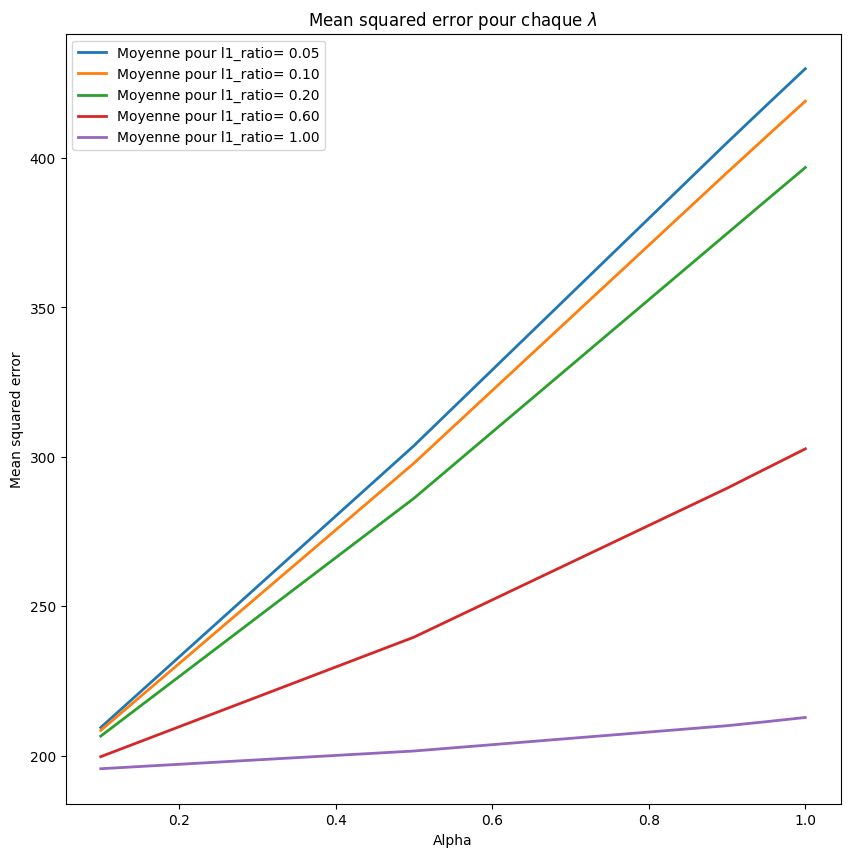

In [ ]:
alphas = lr_en.alphas_
plt.figure(figsize=(10, 10))
for i in range(lr_en.mse_path_.shape[0]) :
    plt.plot(alphas, lr_en.mse_path_[i,:,:].mean(axis=1),
             label='Moyenne pour l1_ratio= %.2f' %lr_en.l1_ratio[i], linewidth=2)

plt.xlabel('Alpha')
plt.ylabel('Mean squared error')
plt.title('Mean squared error pour chaque $\lambda$')
plt.legend();

Ce code semble tracer une courbe montrant l'erreur quadratique moyenne (MSE) pour chaque valeur d'alpha pour différentes valeurs de l1_ratio. Voici ce que chaque partie du code fait :

alphas = lr_en.alphas_ : Récupère les valeurs spécifiques d'alpha qui ont été testées pendant la recherche des hyperparamètres.

plt.figure(figsize=(10, 10)) : Crée une nouvelle figure pour le tracé avec une taille spécifique.

for i in range(lr_en.mse_path_.shape[0]) : : Itère sur les différentes valeurs de l1_ratio utilisées pendant la recherche des hyperparamètres.

plt.plot(alphas, lr_en.mse_path_[i,:,:].mean(axis=1), label='Moyenne pour l1_ratio= %.2f' %lr_en.l1_ratio[i], linewidth=2) : Trace un graphique de ligne représentant la moyenne des MSE pour chaque valeur d'alpha spécifique, pour une valeur donnée de l1_ratio. Chaque ligne représente une valeur de l1_ratio différente, et la moyenne des MSE pour ces valeurs est tracée par rapport à chaque valeur d'alpha.

plt.xlabel('Alpha') : Définit le label de l'axe x comme "Alpha".

plt.ylabel('Mean squared error') : Définit le label de l'axe y comme "Mean squared error".

plt.title('Mean squared error pour chaque $\lambda$') : Définit le titre du graphique comme "Mean squared error pour chaque $\lambda$".

plt.legend() : Affiche la légende du graphique, indiquant quelle ligne correspond à quelle valeur de l1_ratio.

Ce type de visualisation est utile pour comprendre comment l'erreur varie en fonction des valeurs d'alpha pour différentes valeurs de l1_ratio. Cela peut vous aider à choisir les meilleurs hyperparamètres pour votre modèle en identifiant les combinaisons qui minimisent l'erreur sur les données de validation croisée.

In [ ]:
pred_train = lr_en.predict(X_train)
pred_test = lr_en.predict(X_test)


Ces lignes de code utilisent le modèle ElasticNetCV (lr_en) pour effectuer des prédictions sur les ensembles d'entraînement (X_train) et de test (X_test).

pred_train = lr_en.predict(X_train) : Cela génère des prédictions pour les données d'entraînement (X_train) à l'aide du modèle ElasticNetCV entraîné (lr_en). Ces prédictions sont stockées dans la variable pred_train.

pred_test = lr_en.predict(X_test) : De même, cela génère des prédictions pour les données de test (X_test) à l'aide du même modèle ElasticNetCV entraîné. Ces prédictions sont stockées dans la variable pred_test.

Ces prédictions peuvent ensuite être utilisées pour évaluer la performance du modèle sur les données d'entraînement et de test, en comparant les valeurs prédites avec les valeurs réelles pour évaluer l'exactitude du modèle.

In [ ]:
print('score R2 train :',lr_en.score(X_train, y_train))
print('score R2 test :',lr_en.score(X_test, y_test))

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
print("MSE train lr:", mse_train)
print("MSE test lr:", mse_test)

mae_train = mean_absolute_error(y_train, pred_train)
mae_test = mean_absolute_error(y_test, pred_test)
print("MAE train lr:", mae_train)
print("MAE test lr:", mae_test)


score R2 train : 0.8929471496240959
score R2 test : 0.8928642567229556
MSE train lr: 195.61011750660924
MSE test lr: 195.04360060335532
MAE train lr: 9.957181543577196
MAE test lr: 9.94496910979231


Ces lignes de code calculent et affichent plusieurs métriques d'évaluation pour évaluer les performances du modèle ElasticNetCV (lr_en) sur les ensembles d'entraînement et de test.

lr_en.score(X_train, y_train) et lr_en.score(X_test, y_test) : Ces lignes calculent le coefficient de détermination R2 pour les données d'entraînement (X_train, y_train) et de test (X_test, y_test), respectivement. Le score R2 mesure la proportion de la variance dans les données cible (la variable dépendante) expliquée par le modèle.

mean_squared_error(y_train, pred_train) et mean_squared_error(y_test, pred_test) : Ces lignes calculent l'erreur quadratique moyenne (MSE) entre les valeurs réelles et les prédictions pour les ensembles d'entraînement et de test, respectivement. Le MSE mesure la moyenne des carrés des différences entre les prédictions du modèle et les valeurs réelles.

mean_absolute_error(y_train, pred_train) et mean_absolute_error(y_test, pred_test) : Ces lignes calculent l'erreur absolue moyenne (MAE) entre les valeurs réelles et les prédictions pour les ensembles d'entraînement et de test, respectivement. Le MAE mesure la moyenne des valeurs absolues des différences entre les prédictions du modèle et les valeurs réelles.

En affichant ces métriques pour les ensembles d'entraînement et de test, vous obtenez une évaluation de la performance du modèle ElasticNetCV sur les données qu'il a vues pendant l'entraînement (ensemble d'entraînement) ainsi que sur des données inconnues (ensemble de test), ce qui vous donne une idée de sa capacité à généraliser à de nouvelles données.

l1=1, alpha = 1, cv=2, tps = 73s
score R2 train : 0.8932092425799827
score R2 test : 0.8931259041860948
MSE train lr: 195.13121354731587
MSE test lr: 212.11769300566738
MAE train lr: 9.979103577561986
MAE test lr: 10.298823076255285

l1=1, alpha = 1, cv=5, tps = 92s
memes résultats

l1=1, alpha = 0.1, cv=5, tps = 163.02174639701843
score R2 train : 0.8929471496240957
score R2 test : 0.8928642567229552
MSE train lr: 195.61011750660973
MSE test lr: 195.04360060335586
MAE train lr: 9.95718154357721
MAE test lr: 9.944969109792327

257.30258798599243

In [ ]:
pd.DataFrame({'Co2 Observé': y_test, 'Co2 prédit': pred_test},
             index=X_test.index).head(7)

,Co2 Observé,Co2 prédit
6427558,42.0,12.479411
6522017,125.0,153.557568
7278589,168.0,144.849544
2013687,154.0,144.639747
4125831,142.0,138.714612
3297223,129.0,117.454641
2142935,127.0,144.023710


Cette ligne de code crée un DataFrame Pandas qui affiche les valeurs observées de la variable cible 'Co2' (stockées dans y_test) et les valeurs prédites (stockées dans pred_test) pour les données de test (X_test). Cela permet de comparer visuellement les valeurs réelles avec celles prédites par votre modèle.

Voici à quoi ressemblerait le DataFrame créé, affichant les sept premières lignes :

Création du DataFrame pour comparer les valeurs réelles et prédites

comparison_df = pd.DataFrame({'Co2 Observé': y_test, 'Co2 prédit': pred_test}, index=X_test.index)

Affichage des sept premières lignes du DataFrame

comparison_df.head(7)

Ce DataFrame affichera les valeurs réelles observées dans la colonne 'Co2 Observé' et les valeurs prédites dans la colonne 'Co2 prédit' pour les sept premières entrées de vos données de test. Cela permettra d'observer visuellement la manière dont les prédictions de votre modèle correspondent aux valeurs réelles.

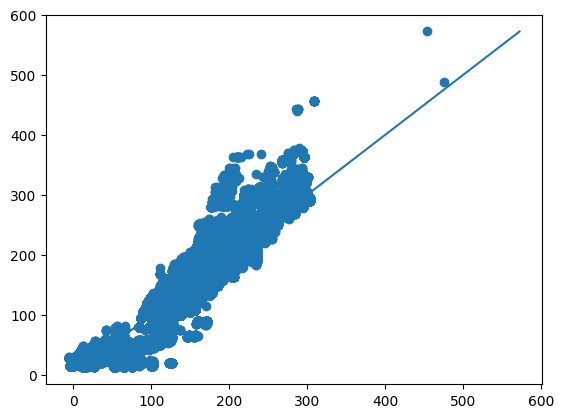

In [ ]:
# Etude des résidus et valeurs abberantes

plt.scatter(pred_test, y_test)
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()));



Ce code semble représenter un graphique de dispersion (scatter plot) des valeurs prédites par votre modèle (pred_test) par rapport aux valeurs réelles observées (y_test). En utilisant plt.scatter, vous placez ces valeurs sur un graphique où l'axe des x correspond aux valeurs prédites et l'axe des y correspond aux valeurs réelles.

De plus, avec plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max())), vous tracez une ligne diagonale reliant les points allant du minimum au maximum des valeurs réelles y_test, ce qui permet de visualiser la relation linéaire parfaite où les valeurs prédites et réelles seraient identiques.

Ce type de graphique est couramment utilisé pour évaluer visuellement la qualité des prédictions du modèle. Une répartition homogène et proche de la ligne diagonale indiquerait une prédiction précise, tandis que des écarts importants par rapport à cette ligne pourraient révéler des erreurs significatives dans les prédictions du modèle, indiquant potentiellement des valeurs aberrantes ou des résidus importants.

In [ ]:
pred_train - y_train

4938477     5.423529
8283439   -10.773089
7033497     4.015346
1753793    21.726310
3625943    -4.643375
             ...    
5760538     2.448508
4444910    10.523529
5920840   -10.684611
7308049    -9.090652
2778534     5.356654
Name: Co2, Length: 4424752, dtype: float64

4938477     5.423529
8283439   -10.773089
7033497     4.015346
1753793    21.726310
3625943    -4.643375
             ...    
5760538     2.448508
4444910    10.523529
5920840   -10.684611
7308049    -9.090652
2778534     5.356654
Name: Co2, Length: 4424752, dtype: float64


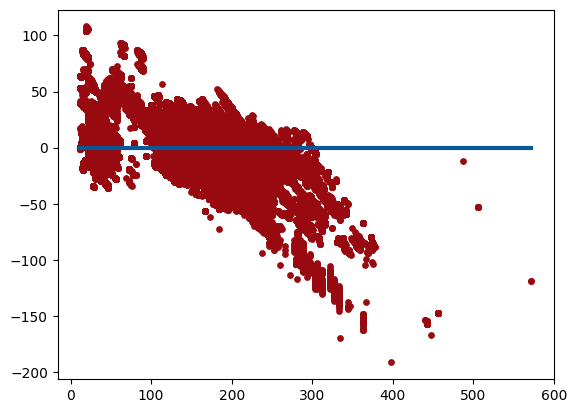

In [ ]:
residus = pred_train - y_train
print(residus)

plt.scatter(y_train, residus, color='#980a10', s=15)
plt.plot((y_train.min(), y_train.max()), (0, 0), lw=3, color='#0a5798')

Ces lignes de code semblent calculer les résidus du modèle sur l'ensemble d'entraînement et ensuite les visualiser à l'aide d'un graphique de dispersion.

residus = pred_train - y_train : Calcule les résidus en soustrayant les valeurs prédites (pred_train) aux valeurs réelles (y_train). Cela donne une série de données représentant les erreurs du modèle pour chaque point de données dans l'ensemble d'entraînement.

plt.scatter(y_train, residus, color='#980a10', s=15) : Crée un graphique de dispersion où l'axe des x représente les valeurs réelles (y_train) et l'axe des y représente les résidus. Chaque point du graphique représente un point de données de l'ensemble d'entraînement. Les résidus sont affichés en fonction des valeurs réelles. La couleur '#980a10' et la taille s=15 spécifient respectivement la couleur et la taille des points dans le graphique de dispersion.

plt.plot((y_train.min(), y_train.max()), (0, 0), lw=3, color='#0a5798') : Trace une ligne horizontale à zéro sur le graphique, montrant la ligne de base où les résidus seraient égaux à zéro. Cette ligne est représentée par une ligne bleue de largeur lw=3.

Ce graphique est utile pour détecter des schémas ou des structures dans les résidus du modèle. Une répartition homogène et proche de zéro autour de l'axe horizontal indiquerait que les résidus sont aléatoires et bien distribués, ce qui est généralement souhaitable pour un bon modèle. Des schémas ou des structures dans les résidus pourraient suggérer des modèles d'erreur sous-jacents que le modèle n'a pas capturés.

((array([-5.11526283, -4.94524168, -4.85358437, ...,  4.85358437,
          4.94524168,  5.11526283]),
  array([-13.68638599, -12.11048579, -11.91881351, ...,   7.64760146,
           7.64760146,   7.71910118])),
 (0.9751600759341134, -4.2312621595801988e-16, 0.9751588142060523))

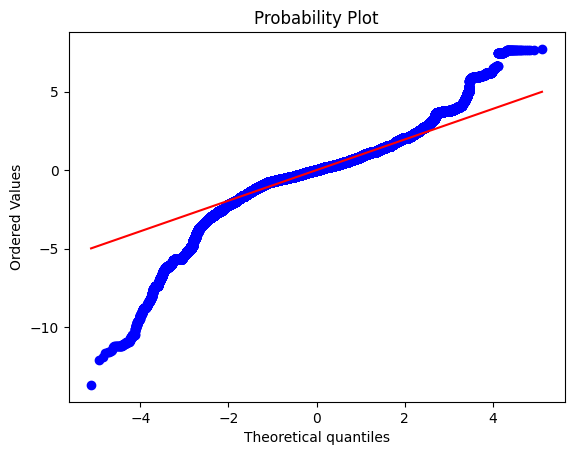

In [ ]:
from scipy import stats

# diagramme Quantile-Quantile ou (Q-Q plot)
residus_norm = preprocessing.scale(residus)
stats.probplot(residus_norm, plot=plt, dist='norm')

Ce code semble utiliser scipy.stats.probplot pour créer un diagramme Quantile-Quantile (Q-Q plot) des résidus standardisés (normalisés) par rapport à une distribution normale.

preprocessing.scale(residus) : Cette ligne normalise les résidus à l'aide de preprocessing.scale (probablement de scikit-learn), les rendant centrés et réduits (c'est-à-dire avec une moyenne nulle et un écart-type de 1). Cela est souvent utile pour comparer des distributions.

stats.probplot(residus_norm, plot=plt, dist='norm') : Cette ligne utilise stats.probplot pour créer le Q-Q plot des résidus normalisés (residus_norm). Le paramètre dist='norm' spécifie que vous comparez ces résidus à une distribution normale. Le graphique généré montrera comment les résidus se comparent à une distribution normale idéale. Si les points suivent approximativement une ligne diagonale, cela suggère que la distribution des résidus est normale. Tout écart important de la ligne indique une divergence par rapport à la distribution normale.

Ce type de graphique est utile pour évaluer si les résidus suivent une distribution normale. Si les résidus suivent approximativement la ligne diagonale, cela suggère qu'ils sont proches d'une distribution normale. Cependant, des déviations marquées de la ligne diagonale pourraient indiquer des problèmes de non-normalité dans les résidus.

In [ ]:
# Temps de calcul en enlevant des features

# Colonnes prises en compte:
X_train.columns.tolist()
lr_en.coef_.tolist()

index = X_train.columns.tolist()
serie = pd.Series(lr_en.coef_.tolist(), index=X_train.columns)
serie.sort_values()


# Drop, puis CV

Fuel_PETROL/ELECTRIC               -22.590772
ElectricRange                      -14.440559
Fuel_DIESEL/ELECTRIC                -6.944712
Pool_MAZDA-SUBARU-SUZUKI-TOYOTA     -2.810467
Pool_BMW                            -2.774879
EngineCapacity                      -1.492809
Pool_HYUNDAI MOTOR EUROPE           -0.605889
Pool_HYUNDAI                        -0.535431
Fuel_NG                             -0.378919
Pool_TESLA-HONDA-JLR                -0.305301
Pool_FORD                           -0.093454
Pool_TESLA                          -0.078424
InnovativeTechnology                -0.000000
Fuel_NATURALGAS                      0.000000
Fuel_ETHANOL                         0.000000
Pool_RENAULT-NISSAN-MITSUBISHI      -0.000000
Pool_STELLANTIS                      0.000000
Fuel_DIESEL                         -0.000000
InnovativeEmissionsReductionWltp     0.075376
Pool_KIA                             0.147241
Pool_MERCEDES-BENZ                   0.234404
Fuel_LPG                          

Il semble que vous souhaitiez mesurer le temps de calcul après avoir éliminé certaines fonctionnalités de vos données. Voici comment vous pourriez procéder :

Enregistrement des colonnes initiales : Avant de supprimer des fonctionnalités, vous avez enregistré les noms de colonnes initiales et les coefficients correspondants dans une série Pandas pour référence ultérieure.

Suppression de fonctionnalités : Maintenant, vous pouvez supprimer certaines fonctionnalités de votre ensemble de données X_train. Supposons que vous vouliez supprimer les fonctionnalités avec les coefficients les plus faibles selon le modèle. Vous pouvez utiliser serie.sort_values() pour identifier les fonctionnalités avec les coefficients les plus faibles, puis supprimer celles que vous souhaitez.

Entraînement du modèle après la suppression : Après avoir supprimé ces fonctionnalités, vous pouvez entraîner à nouveau votre modèle ElasticNetCV (lr_en) avec cet ensemble de données réduit.

En mesurant le temps d'entraînement avant et après la suppression des fonctionnalités, vous pouvez évaluer si la réduction du nombre de fonctionnalités a un impact significatif sur le temps de calcul de votre modèle. Cela peut être particulièrement utile pour des ensembles de données volumineux ou des modèles prenant beaucoup de temps pour s'entraîner.

In [ ]:
# Regression polynomiale, Stacking, boosting
# 1) Feature importance + Reduction features
# 2) XGBoost

# XGBoosting – (Extreme Gradient Boosting)

In [ ]:
import xgboost as xgb

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size = 0.2, random_state = 3)

train = xgb.DMatrix(data = X_train, label = y_train)
test = xgb.DMatrix(data = X_test, label = y_test)
valid = xgb.DMatrix(data = X_valid, label = y_valid)


In [ ]:
params = {'booster' : 'gbtree', 'learning_rate' : 1, 'objective' : 'reg:linear'}
model = xgb.train(params=params, dtrain = train, num_boost_round = 100, early_stopping_rounds = 15, evals= [(train, 'train'), (test, 'valid')] )
# préferer  'learning_rate' << 1 → 0,01  et num_boost_round grand = 700,

preds = model.predict(test)

[23:55:21] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:10.72408	valid-rmse:10.72052
[1]	train-rmse:9.08381	valid-rmse:9.08370
[2]	train-rmse:8.66841	valid-rmse:8.66994
[3]	train-rmse:7.89537	valid-rmse:7.90085
[4]	train-rmse:7.45741	valid-rmse:7.45948
[5]	train-rmse:7.05253	valid-rmse:7.04950
[6]	train-rmse:6.76491	valid-rmse:6.75610
[7]	train-rmse:6.47431	valid-rmse:6.46668
[8]	train-rmse:6.24234	valid-rmse:6.23594
[9]	train-rmse:6.00771	valid-rmse:5.99308
[10]	train-rmse:5.81669	valid-rmse:5.80619
[11]	train-rmse:5.69634	valid-rmse:5.68512
[12]	train-rmse:5.55038	valid-rmse:5.54106
[13]	train-rmse:5.40895	valid-rmse:5.40109
[14]	train-rmse:5.27627	valid-rmse:5.27019
[15]	train-rmse:5.04531	valid-rmse:5.03927
[16]	train-rmse:4.97399	valid-rmse:4.96649
[17]	train-rmse:4.87388	valid-rmse:4.86956
[18]	train-rmse:4.81191	valid-rmse:4.80804
[19]	train-rmse:

In [ ]:
pred_test = model.predict(test)
pred_train = model.predict(train)

In [ ]:
print('score R2 train :',model.best_score)
# print('score R2 test :',model.best_score(X_test, y_test))

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
print("MSE train lr:", mse_train)
print("MSE test lr:", mse_test)

mae_train = mean_absolute_error(y_train, pred_train)
mae_test = mean_absolute_error(y_test, pred_test)
print("MAE train lr:", mae_train)
print("MAE test lr:", mae_test)

score R2 train : 2.8301148703844112
MSE train lr: 7.999077
MSE test lr: 8.009551
MAE train lr: 1.8144857
MAE test lr: 1.8160788


In [ ]:
pd.DataFrame({'Co2 Observé': y_test, 'Co2 prédit': pred_test},
             index=X_test.index).head(20)

,Co2 Observé,Co2 prédit
3884486,116.0,115.681137
689879,122.0,122.408150
4775564,119.0,119.683968
2629803,127.0,125.130898
5321107,131.0,132.496048
5577197,144.0,142.115555
4662106,164.0,158.568451
7358172,26.0,28.680935
341812,33.0,32.214375
4118152,140.0,140.658859


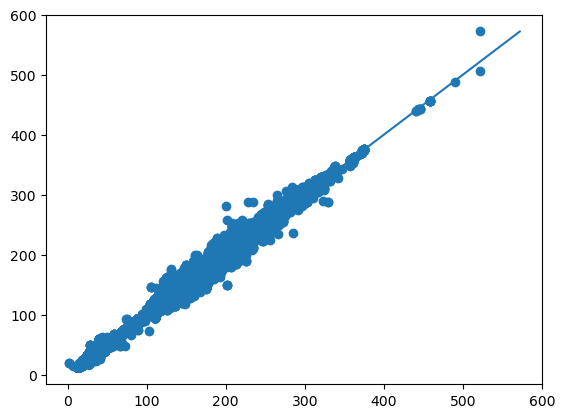

In [ ]:
# Etude des résidus et valeurs abberantes

plt.scatter(pred_test, y_test)
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()));


4159548   -5.921432
4211398   -3.295929
378088    -1.358887
6374739    1.292648
8209920    6.510742
             ...   
7503406   -0.123138
5341262   -3.341476
67884     -0.071671
785529     1.739197
4542428   -1.884445
Name: Co2, Length: 4045488, dtype: float32


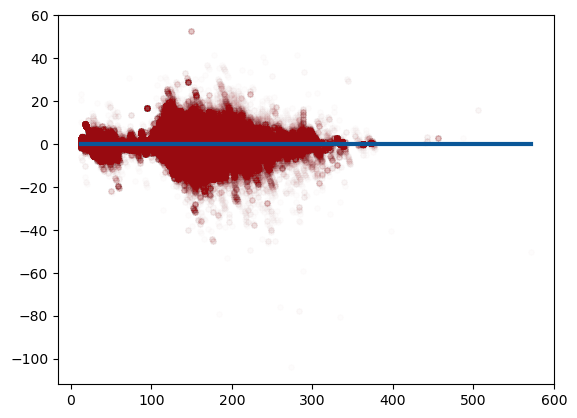

In [ ]:
residus = pred_train - y_train
print(residus)

plt.scatter(y_train, residus, color='#980a10', s=15, alpha = 0.01)
plt.plot((y_train.min(), y_train.max()), (0, 0), lw=3, color='#0a5798')

C:\Users\ludov\.conda\envs\env_ML\Lib\site-packages\sklearn\preprocessing\_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
C:\Users\ludov\.conda\envs\env_ML\Lib\site-packages\sklearn\preprocessing\_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


((array([-5.0983225 , -4.92775676, -4.83579151, ...,  4.83579151,
          4.92775676,  5.0983225 ]),
  array([-36.82495 , -28.437065, -27.946213, ...,  18.535912,  18.535912,
          18.535912], dtype=float32)),
 (0.9481637039085984, 1.3228472518534262e-07, 0.9481623994023802))

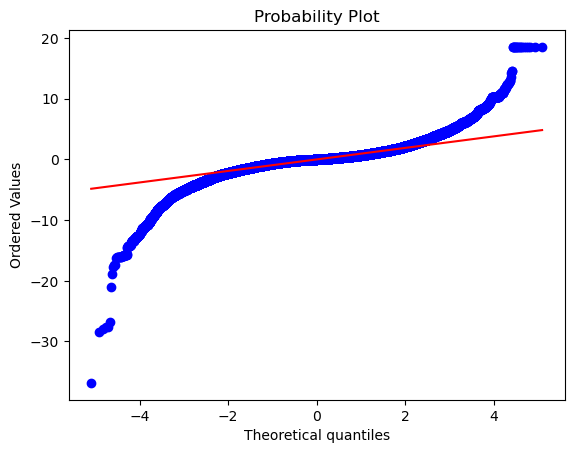

In [ ]:
from scipy import stats

# diagramme Quantile-Quantile ou (Q-Q plot)
residus_norm = preprocessing.scale(residus)
stats.probplot(residus_norm, plot=plt, dist='norm')

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

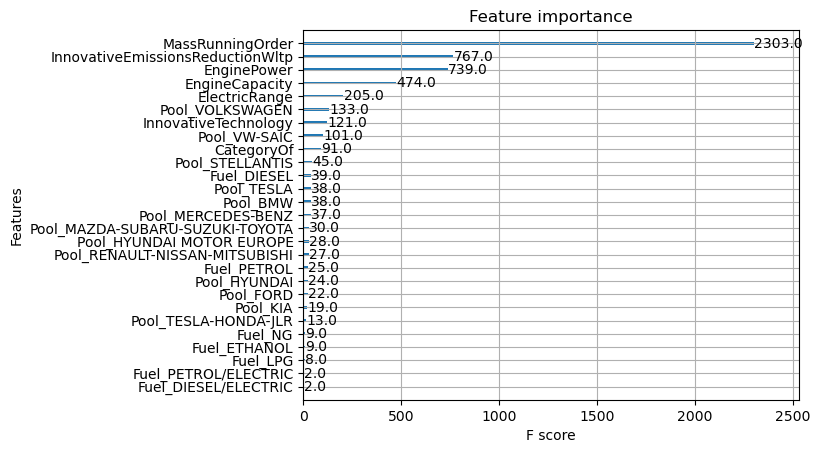

In [ ]:
xgb.plot_importance(model)